In [1]:
import time
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [2]:
column_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']


In [3]:
df= pd.read_csv("cleveland.data", delimiter=',', header=None, names=column_names)

In [4]:
types=df.dtypes
print(types)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
#rearranging quality and creating a new column named categorized quality
df['target'] = [1 if x > 0 else 0 for x in df['num']]

#testing the rearranging worked
print('\nColumn Name:', 'num',)
print(df['num'].value_counts())
print('\nColumn Name:', 'target',)
print(df['target'].value_counts())


Column Name: num
0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Column Name: target
0    164
1    139
Name: target, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [8]:
df.shape

(303, 15)

In [9]:
# Replace '?' with NaN
df['ca'] = df['ca'].replace('?', np.nan)

# Convert to float type
df['ca'] = df['ca'].astype(float)

In [10]:
# Replace '?' with NaN
df['thal'] = df['thal'].replace('?', np.nan)

# Convert to float type
df['thal'] = df['thal'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 35.6 KB


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
target      0
dtype: int64

In [13]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
null_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0,0


In [14]:
df=df.dropna()

In [15]:
shuffled_df = df.sample(frac=1.0, random_state=42)
shuffled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
169,45.0,0.0,2.0,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0,0,0
214,52.0,1.0,4.0,112.0,230.0,0.0,0.0,160.0,0.0,0.0,1.0,1.0,3.0,1,1
63,54.0,0.0,3.0,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0,0
155,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1,1
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0


In [16]:
shuffled_df.shape

(297, 15)

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


In [18]:
y = shuffled_df["target"]
X = shuffled_df.drop(['target','num'],axis=1)
print(X.shape)
X.head()

(297, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
169,45.0,0.0,2.0,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0
214,52.0,1.0,4.0,112.0,230.0,0.0,0.0,160.0,0.0,0.0,1.0,1.0,3.0
63,54.0,0.0,3.0,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0
155,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (237, 13)
y_train shape: (237,)
X_test shape: (60, 13)
y_test shape: (60,)


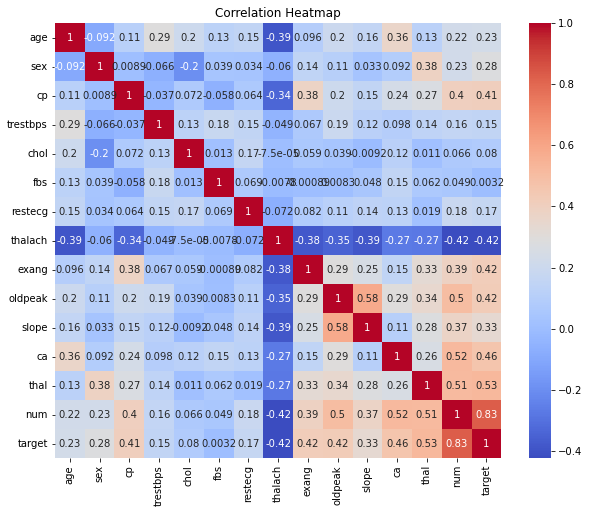

In [21]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

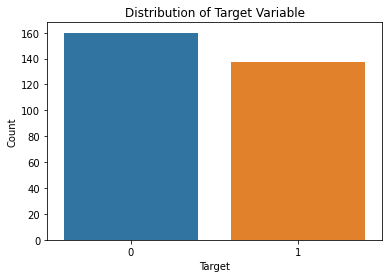

In [22]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [23]:
#Variable Correlations with the target "Quality"
df.corr()['target'].sort_values(ascending=False)

target      1.000000
num         0.829608
thal        0.526640
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: target, dtype: float64

## Model Selection

### Logistic Regression

In [24]:
%%time

warnings.filterwarnings('ignore')

# Logistic Regression model
log_reg = LogisticRegression()
hyperparameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100,250 ,500, 1000],
    'tol': [1e-6, 1e-5, 1e-4, 1e-3],
    'class_weight': [None, 'balanced']
}
grid_log_reg = GridSearchCV(log_reg, hyperparameters, cv=5, n_jobs=-1)
grid_log_reg.fit(X_train, y_train)
best_params_log_reg=grid_log_reg.best_params_
print("Best Logistic Regression parameters:", grid_log_reg.best_params_)
print("Best Logistic Regression score:", grid_log_reg.best_score_)

Best Logistic Regression parameters: {'C': 1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06}
Best Logistic Regression score: 0.8520390070921986
CPU times: user 3.22 s, sys: 133 ms, total: 3.36 s
Wall time: 5.38 s


In [25]:
best_log_reg = LogisticRegression(**best_params_log_reg)
best_log_reg.fit(X_train, y_train)
y_predicted = best_log_reg.predict(X_test)

best_log_reg_conf_matrix = confusion_matrix(y_test, y_predicted)
best_log_reg_acc_score = accuracy_score(y_test, y_predicted)
print("confussion matrix")
print(best_log_reg_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",best_log_reg_acc_score*100,'\n')
print(classification_report(y_test,y_predicted))

confussion matrix
[[25  5]
 [ 8 22]]


Accuracy of Logistic Regression: 78.33333333333333 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



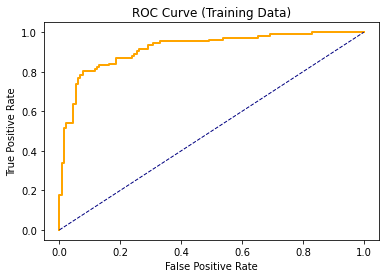

In [26]:
#Using a cross validation to predict the probabilities of the training data
best_log_reg_proba_cv = cross_val_predict(best_log_reg, X_train, y_train,method='predict_proba', cv=5)

#Choosing the second column containing the predicted probabilities
y_train_cv_score_best_log_reg = best_log_reg_proba_cv[:, 1]

#getting the rates and tresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_cv_score_best_log_reg)

#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr, tpr, color='orange', linewidth=2) 
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [27]:
#Area under ROC curve
roc_auc_score(y_train, y_train_cv_score_best_log_reg)

0.9178289000718907

In [28]:
best_log_reg.fit(X_train, y_train)

train_score = best_log_reg.score(X_train, y_train)
test_score = best_log_reg.score(X_test, y_test)

cv_scores = cross_val_score(best_log_reg, X, y, cv=5)  # 5-fold cross-validation
mean_cv_score = cv_scores.mean()

print("Training score:", train_score)
print("Test score:", test_score)
print("Cross-validated scores:", cv_scores)
print("Mean cross-validated score:", mean_cv_score)

Training score: 0.8776371308016878
Test score: 0.7833333333333333
Cross-validated scores: [0.85       0.75       0.88135593 0.83050847 0.83050847]
Mean cross-validated score: 0.8284745762711865


### Naive Bayes

In [29]:
from sklearn.preprocessing import MinMaxScaler
#nomalizing data for the multinomial distribution as it does not take negatives
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [30]:
models = {'GaussianNB': GaussianNB(),
          'MultinomialNB':MultinomialNB(),
          'BernoulliNB': BernoulliNB()}
best_nb_model = None
best_nb_score = 0
for name, model in models.items():
    score = np.mean(cross_val_score(model, X_train_normalized, y_train, cv=5))
    if score > best_nb_score:
        best_nb_score = score
        best_nb_model = name
print("Best Naive Bayes model:", best_nb_model)

Best Naive Bayes model: GaussianNB


In [31]:
hyperparameters = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GaussianNB()

grid_gnb = GridSearchCV(gnb, hyperparameters, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_gnb.fit(X_train, y_train)

best_params_gnb = grid_gnb.best_params_

print("Best Naive Bayes  parameters:", best_params_gnb)
print("Best Naive Bayes score (accuracy):", grid_gnb.best_score_)
print("\n")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Naive Bayes  parameters: {'var_smoothing': 0.533669923120631}
Best Naive Bayes score (accuracy): 0.8351950354609929




In [32]:
best_gnb = GaussianNB(**best_params_gnb)
best_gnb.fit(X_train, y_train)
y_predicted_gnb = best_gnb.predict(X_test)

best_gnb_conf_matrix = confusion_matrix(y_test, y_predicted_gnb)
best_gnb_acc_score = accuracy_score(y_test, y_predicted_gnb)
print("confussion matrix")
print(best_gnb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes:",best_gnb_acc_score*100,'\n')
print(classification_report(y_test,y_predicted_gnb))

confussion matrix
[[28  2]
 [ 7 23]]


Accuracy of Naive Bayes: 85.0 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        30

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



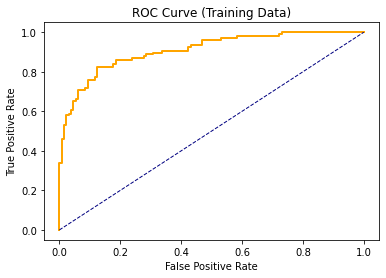

In [33]:
#Using a cross validation to predict the probabilities of the training data
best_gnb_proba_cv = cross_val_predict(best_gnb, X_train, y_train,method='predict_proba', cv=5)

#Choosing the second column containing the predicted probabilities
y_train_cv_score_best_gnb = best_gnb_proba_cv[:, 1]

#getting the rates and tresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_cv_score_best_gnb)

#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr, tpr, color='orange', linewidth=2) 
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [34]:
#Area under ROC curve
roc_auc_score(y_train, y_train_cv_score_best_gnb)

0.9087706685837527

In [35]:
best_gnb.fit(X_train, y_train)

gnb_train_score = best_gnb.score(X_train, y_train)
gnb_test_score = best_gnb.score(X_test, y_test)
gnb_cv_scores = cross_val_score(best_gnb, X, y, cv=5)  # 5-fold cross-validation
gnb_mean_cv_score = gnb_cv_scores.mean()

print("Training score:", gnb_train_score)
print("Test score:", gnb_test_score)
print("Cross-validated scores:", gnb_cv_scores)
print("Mean cross-validated score:", gnb_mean_cv_score)

Training score: 0.8481012658227848
Test score: 0.85
Cross-validated scores: [0.63333333 0.66666667 0.69491525 0.57627119 0.59322034]
Mean cross-validated score: 0.6328813559322034


## SVM

In [36]:
%%time
warnings.filterwarnings('ignore')

# Support Vector Machines model
hyperparameters = {'C': [0.001,0.01,0.1, 1,10, 100],
'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
'gamma': ['scale', 'auto']}
svm=SVC()
grid_svm = GridSearchCV(svm, hyperparameters, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_params_svm=grid_svm.best_params_
print("Best SVM parameters:", grid_svm.best_params_)
print("Best SVM score:", grid_svm.best_score_)

Best SVM parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best SVM score: 0.8603723404255319
CPU times: user 464 ms, sys: 7.46 ms, total: 472 ms
Wall time: 211 ms


In [37]:
#testing model with optimal parameters
best_svm = SVC(**best_params_svm,probability=True)

best_svm.fit(X_train, y_train)
y_predicted_svm = best_svm.predict(X_test)

best_svm_conf_matrix = confusion_matrix(y_test, y_predicted_svm)
best_svm_acc_score = accuracy_score(y_test, y_predicted_svm)
print("confussion matrix")
print(best_svm_conf_matrix)
print("\n")
print("Accuracy of SVM:",best_svm_acc_score*100,'\n')
print(classification_report(y_test,y_predicted_svm))

confussion matrix
[[28  2]
 [ 8 22]]


Accuracy of SVM: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



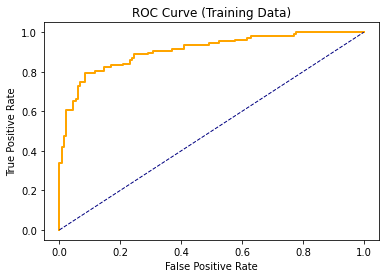

In [38]:
#Using a cross validation to predict the probabilities of the training data
best_svm_proba_cv = cross_val_predict(best_svm, X_train, y_train,method='predict_proba', cv=5)

y_train_cv_proba_best_svm = best_svm_proba_cv[:, 1]

#getting the rates and tresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_cv_proba_best_svm)

#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr, tpr, color='orange', linewidth=2) 
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [39]:
# Area under ROC curve
roc_auc_score(y_train, y_train_cv_proba_best_svm)

0.9074047447879222

In [40]:
best_svm.fit(X_train, y_train)

svm_train_score = best_svm.score(X_train, y_train)
svm_test_score = best_svm.score(X_test, y_test)
svm_cv_scores = cross_val_score(best_svm, X, y, cv=5)
svm_mean_cv_score = svm_cv_scores.mean()

print("Training score:", svm_train_score)
print("Test score:", svm_test_score)
print("Cross-validated scores:", svm_cv_scores)
print("Mean cross-validated score:", svm_mean_cv_score)

Training score: 0.8607594936708861
Test score: 0.8333333333333334
Cross-validated scores: [0.53333333 0.53333333 0.54237288 0.54237288 0.54237288]
Mean cross-validated score: 0.5387570621468927


## Decision Tree

In [41]:
%%time
warnings.filterwarnings('ignore')
#Decision Tree Model
dtc=DecisionTreeClassifier()
hyperparameters ={
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10, 15],
    "max_features": [int, float, "sqrt", "log2", None],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_leaf_nodes": [None, 5, 10, 15, 20],
    "min_impurity_decrease": [0.0, 0.1, 0.2, 0.3, 0.4]
}
grid_dtc = GridSearchCV(dtc, hyperparameters, cv=5, n_jobs=-1)
grid_dtc.fit(X_train, y_train)
best_params_dtc=grid_dtc.best_params_
print("Best Decision Tree parameters:", grid_dtc.best_params_)
print("Best Decision Tree score:", grid_dtc.best_score_)

Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Decision Tree score: 0.8355496453900709
CPU times: user 26.1 s, sys: 466 ms, total: 26.6 s
Wall time: 31.6 s


In [42]:
#testing model with optimal parameters
best_dtc = DecisionTreeClassifier(**best_params_dtc)

best_dtc.fit(X_train, y_train)
y_predicted_dtc = best_dtc.predict(X_test)

best_dtc_conf_matrix = confusion_matrix(y_test, y_predicted_dtc)
best_dtc_acc_score = accuracy_score(y_test, y_predicted_dtc)
print("confussion matrix")
print(best_dtc_conf_matrix)
print("\n")
print("Accuracy of Decision Tree Clasifier:",best_dtc_acc_score*100,'\n')
print(classification_report(y_test,y_predicted_dtc))

tn, fp, fn, tp = best_dtc_conf_matrix.ravel()

print("Confusion Matrix:")
print("      Predicted")
print("       +   -")
print(f"True  + {tp} {fn}")
print(f"      - {fp} {tn}")

confussion matrix
[[26  4]
 [10 20]]


Accuracy of Decision Tree Clasifier: 76.66666666666667 

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.83      0.67      0.74        30

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.76        60
weighted avg       0.78      0.77      0.76        60

Confusion Matrix:
      Predicted
       +   -
True  + 20 10
      - 4 26


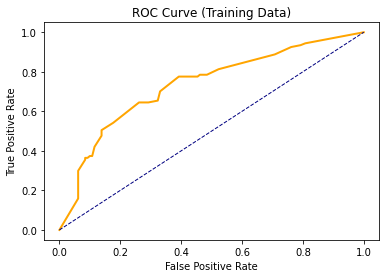

In [43]:
#Using a cross validation to predict the probabilities of the training data
best_dtc_proba_cv = cross_val_predict(best_dtc, X_train, y_train,method='predict_proba', cv=5)

#Choosing the second column containing the predicted probabilities
#
#Remember to update the names of the prior variables as y_train_cv_proba_best_svm-> from y_train_cv_scores_best_svm
#
y_train_cv_proba_best_dtc = best_dtc_proba_cv[:, 1]

#getting the rates and tresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_cv_proba_best_dtc)

#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr, tpr, color='orange', linewidth=2) 
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [44]:
# Area under ROC curve
roc_auc_score(y_train, y_train_cv_proba_best_dtc)

0.7335729690869878

In [45]:
best_dtc.fit(X_train, y_train)
dtc_train_score = best_dtc.score(X_train, y_train)
dtc_test_score = best_dtc.score(X_test, y_test)
dtc_cv_scores = cross_val_score(best_dtc, X, y, cv=5)
dtc_mean_cv_score = dtc_cv_scores.mean()

print("Training score:", dtc_train_score)
print("Test score:", dtc_test_score)
print("Cross-validated scores:", dtc_cv_scores)
print("Mean cross-validated score:", dtc_mean_cv_score)

Training score: 0.810126582278481
Test score: 0.75
Cross-validated scores: [0.76666667 0.68333333 0.83050847 0.76271186 0.81355932]
Mean cross-validated score: 0.7713559322033899


## KNN

In [46]:
%%time
warnings.filterwarnings('ignore')

# KNN Model
knn = KNeighborsClassifier()
hyperparameters = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2]
}
grid_knn = GridSearchCV(knn, hyperparameters, cv=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_params_knn=grid_knn.best_params_
print("Best KNN parameters:", grid_knn.best_params_)
print("Best KNN score:", grid_knn.best_score_)

Best KNN parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Best KNN score: 0.8602836879432625
CPU times: user 561 ms, sys: 29.1 ms, total: 590 ms
Wall time: 406 ms


In [47]:
#testing model with optimal parameters
best_knn = KNeighborsClassifier(**best_params_knn)

best_knn.fit(X_train, y_train)
y_predicted_knn = best_knn.predict(X_test)

best_knn_conf_matrix = confusion_matrix(y_test, y_predicted_knn)
best_knn_acc_score = accuracy_score(y_test, y_predicted_knn)
print("confussion matrix")
print(best_knn_conf_matrix)
print("\n")
print("Accuracy of KNN Clasifier:",best_knn_acc_score*100,'\n')
print(classification_report(y_test,y_predicted_dtc))

tn, fp, fn, tp = best_knn_conf_matrix.ravel()

print("Confusion Matrix:")
print("      Predicted")
print("       +   -")
print(f"True  + {tp} {fn}")
print(f"      - {fp} {tn}")

confussion matrix
[[25  5]
 [ 8 22]]


Accuracy of KNN Clasifier: 78.33333333333333 

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.83      0.67      0.74        30

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.76        60
weighted avg       0.78      0.77      0.76        60

Confusion Matrix:
      Predicted
       +   -
True  + 22 8
      - 5 25


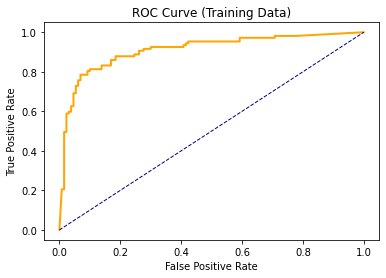

In [48]:
#Using a cross validation to predict the probabilities of the training data
best_knn_proba_cv = cross_val_predict(best_knn, X_train, y_train,method='predict_proba', cv=5)

y_train_cv_proba_best_knn = best_knn_proba_cv[:, 1]

#getting the rates and tresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_cv_proba_best_knn)

#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr, tpr, color='orange', linewidth=2) 
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [49]:
# Area under ROC curve
roc_auc_score(y_train, y_train_cv_proba_best_knn)

0.9105679367361611

In [50]:
best_knn.fit(X_train, y_train)
knn_train_score = best_knn.score(X_train, y_train)
knn_test_score = best_knn.score(X_test, y_test)
knn_cv_scores = cross_val_score(best_knn, X, y, cv=5)  # 5-fold cross-validation
knn_mean_cv_score = knn_cv_scores.mean()

print("Training score:", knn_train_score)
print("Test score:", knn_test_score)
print("Cross-validated scores:", knn_cv_scores)
print("Mean cross-validated score:", knn_mean_cv_score)

Training score: 1.0
Test score: 0.7833333333333333
Cross-validated scores: [0.73333333 0.68333333 0.6440678  0.57627119 0.57627119]
Mean cross-validated score: 0.6426553672316384


### Evaluating Models

In [51]:
print("Accuracy of Logistic Regression:",best_log_reg_acc_score*100,'\n')
print(classification_report(y_test,y_predicted))

Accuracy of Logistic Regression: 78.33333333333333 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [52]:
print("Accuracy of Naive Bayes:",best_gnb_acc_score*100,'\n')
print(classification_report(y_test,y_predicted_gnb))

Accuracy of Naive Bayes: 85.0 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        30

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [53]:
print("Accuracy of Support Vector Machines:",best_svm_acc_score*100,'\n')
print(classification_report(y_test,y_predicted_svm))

Accuracy of Support Vector Machines: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [54]:
print("Accuracy of Decision Tree:",best_dtc_acc_score*100,'\n')
print(classification_report(y_test,y_predicted_dtc))

Accuracy of Decision Tree: 76.66666666666667 

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.83      0.67      0.74        30

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.76        60
weighted avg       0.78      0.77      0.76        60



In [55]:
print("Accuracy of KNN:",best_knn_acc_score*100,'\n')
print(classification_report(y_test,y_predicted_knn))

Accuracy of KNN: 78.33333333333333 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



### Ensemble Model

In [76]:
estimators = [
('log_reg', grid_log_reg.best_estimator_),
('gnb', grid_gnb.best_estimator_),
('svm', grid_svm.best_estimator_),
('dtc', grid_dtc.best_estimator_),
('knn', grid_knn.best_estimator_),  
]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, y_train)
y_predicted_stacking=stacking_classifier.predict(X_test)

stacking_score = stacking_classifier.score(X_test, y_test)
print("Stacking Classifier score:", stacking_score*100)
print(classification_report(y_test,y_predicted_stacking))


print("Confusion Matrix:")
print("      Predicted")
print("       +   -")
print(f"True  + {tp} {fn}")
print(f"      - {fp} {tn}")

Stacking Classifier score: 83.33333333333334
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.88      0.77      0.82        30

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Confusion Matrix:
      Predicted
       +   -
True  + 22 8
      - 5 25


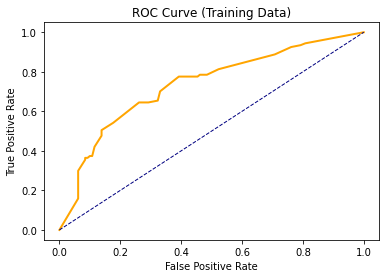

In [59]:
#Using a cross validation to predict the probabilities of the training data
stacking_classifier_proba_cv = cross_val_predict(stacking_classifier, X_train, y_train,method='predict_proba', cv=5)

y_train_cv_proba_stacking_classifier = best_dtc_proba_cv[:, 1]

#getting the rates and tresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_cv_proba_stacking_classifier)

#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr, tpr, color='orange', linewidth=2) 
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [60]:
# Area under ROC curve
roc_auc_score(y_train, y_train_cv_proba_stacking_classifier)

0.7335729690869878

In [61]:
stacking_classifier.fit(X_train, y_train)
stacking_classifier_train_score = stacking_classifier.score(X_train, y_train)
stacking_classifier_test_score = stacking_classifier.score(X_test, y_test)
stacking_classifier_cv_scores = cross_val_score(stacking_classifier, X, y, cv=5)  # 5-fold cross-validation
stacking_classifier_mean_cv_score = stacking_classifier_cv_scores.mean()

print("Training score:", stacking_classifier_train_score)
print("Test score:", stacking_classifier_test_score)
print("Cross-validated scores:", stacking_classifier_cv_scores)
print("Mean cross-validated score:", stacking_classifier_mean_cv_score)

Training score: 0.9113924050632911
Test score: 0.8333333333333334
Cross-validated scores: [0.85       0.73333333 0.86440678 0.83050847 0.84745763]
Mean cross-validated score: 0.8251412429378531


### Multilayer Perceptron

### Testing my MLP

In [62]:
X_train.shape[1]

13

In [63]:
#### best model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
input_features = X_train.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(64, input_shape=(input_features,), activation='relu'))

# Add dropout regularization
dropout_rate = 0.6  # Dropout rate between 0 and 1 (0 means no dropout, 1 means all neurons are dropped)
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='sigmoid'))


# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250, batch_size=10)

# evaluate the keras model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/250
24/24 [==============================] - 0s 614us/step - loss: 0.7059 - accuracy: 0.5738
Epoch 2/250


2023-05-20 02:43:45.566182: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


24/24 [==============================] - 0s 813us/step - loss: 0.5768 - accuracy: 0.6920
Epoch 3/250
24/24 [==============================] - 0s 610us/step - loss: 0.5211 - accuracy: 0.7511
Epoch 4/250
24/24 [==============================] - 0s 595us/step - loss: 0.4540 - accuracy: 0.8059
Epoch 5/250
24/24 [==============================] - 0s 529us/step - loss: 0.4376 - accuracy: 0.8312
Epoch 6/250
24/24 [==============================] - 0s 564us/step - loss: 0.4398 - accuracy: 0.7890
Epoch 7/250
24/24 [==============================] - 0s 540us/step - loss: 0.4313 - accuracy: 0.8059
Epoch 8/250
24/24 [==============================] - 0s 591us/step - loss: 0.4129 - accuracy: 0.8186
Epoch 9/250
24/24 [==============================] - 0s 597us/step - loss: 0.3929 - accuracy: 0.8397
Epoch 10/250
24/24 [==============================] - 0s 600us/step - loss: 0.4094 - accuracy: 0.8397
Epoch 11/250
24/24 [==============================] - 0s 591us/step - loss: 0.3762 - accuracy: 0.8312


24/24 [==============================] - 0s 477us/step - loss: 0.2287 - accuracy: 0.9072
Epoch 83/250
24/24 [==============================] - 0s 489us/step - loss: 0.2668 - accuracy: 0.8819
Epoch 84/250
24/24 [==============================] - 0s 513us/step - loss: 0.2623 - accuracy: 0.8734
Epoch 85/250
24/24 [==============================] - 0s 514us/step - loss: 0.2477 - accuracy: 0.9241
Epoch 86/250
24/24 [==============================] - 0s 467us/step - loss: 0.2113 - accuracy: 0.9156
Epoch 87/250
24/24 [==============================] - 0s 526us/step - loss: 0.2349 - accuracy: 0.9072
Epoch 88/250
24/24 [==============================] - 0s 500us/step - loss: 0.2446 - accuracy: 0.9114
Epoch 89/250
24/24 [==============================] - 0s 453us/step - loss: 0.2840 - accuracy: 0.8945
Epoch 90/250
24/24 [==============================] - 0s 499us/step - loss: 0.2704 - accuracy: 0.8861
Epoch 91/250
24/24 [==============================] - 0s 451us/step - loss: 0.2860 - accuracy: 

24/24 [==============================] - 0s 477us/step - loss: 0.1919 - accuracy: 0.9241
Epoch 162/250
24/24 [==============================] - 0s 468us/step - loss: 0.2575 - accuracy: 0.8987
Epoch 163/250
24/24 [==============================] - 0s 438us/step - loss: 0.2080 - accuracy: 0.9198
Epoch 164/250
24/24 [==============================] - 0s 456us/step - loss: 0.2049 - accuracy: 0.9072
Epoch 165/250
24/24 [==============================] - 0s 506us/step - loss: 0.2021 - accuracy: 0.9241
Epoch 166/250
24/24 [==============================] - 0s 482us/step - loss: 0.1907 - accuracy: 0.9241
Epoch 167/250
24/24 [==============================] - 0s 464us/step - loss: 0.2025 - accuracy: 0.9241
Epoch 168/250
24/24 [==============================] - 0s 471us/step - loss: 0.2060 - accuracy: 0.9198
Epoch 169/250
24/24 [==============================] - 0s 439us/step - loss: 0.1559 - accuracy: 0.9536
Epoch 170/250
24/24 [==============================] - 0s 454us/step - loss: 0.2215 - a

24/24 [==============================] - 0s 476us/step - loss: 0.1707 - accuracy: 0.9325
Epoch 241/250
24/24 [==============================] - 0s 459us/step - loss: 0.1751 - accuracy: 0.9409
Epoch 242/250
24/24 [==============================] - 0s 464us/step - loss: 0.1752 - accuracy: 0.9325
Epoch 243/250
24/24 [==============================] - 0s 458us/step - loss: 0.1735 - accuracy: 0.9325
Epoch 244/250
24/24 [==============================] - 0s 433us/step - loss: 0.1698 - accuracy: 0.9198
Epoch 245/250
24/24 [==============================] - 0s 433us/step - loss: 0.1726 - accuracy: 0.9409
Epoch 246/250
24/24 [==============================] - 0s 454us/step - loss: 0.1711 - accuracy: 0.9494
Epoch 247/250
24/24 [==============================] - 0s 448us/step - loss: 0.1641 - accuracy: 0.9451
Epoch 248/250
24/24 [==============================] - 0s 479us/step - loss: 0.2023 - accuracy: 0.9072
Epoch 249/250
24/24 [==============================] - 0s 439us/step - loss: 0.1934 - a

## Clustering

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#dropping target
data_ul = shuffled_df.drop(['target'],axis=1)
print(data_ul.shape)
data_ul.head()
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_ul)

(297, 14)


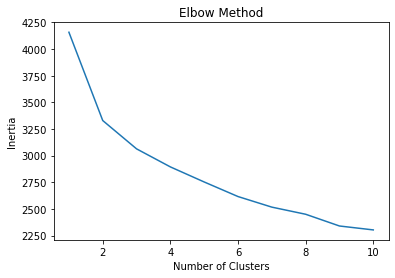

In [67]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    
    
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


### Determining the optimal k for K-means

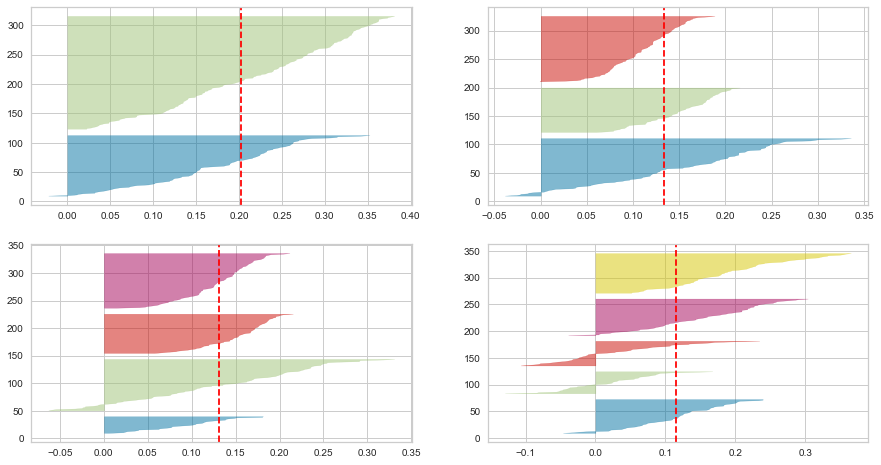

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
#     Create KMeans instances for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled) 

### Perform K-means

In [77]:
# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Perform KMeans clustering with the optimal number of clusters
optimal_clusters = 2  # Replace this with the optimal number of clusters based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

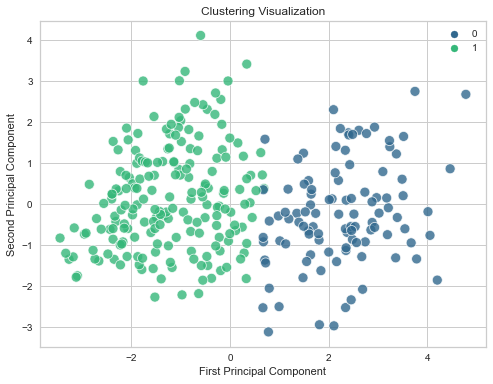

In [78]:
# Visualize the clusters in the 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.8)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clustering Visualization')
plt.show()

In [79]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Calculate silhouette score
score = silhouette_score(data_scaled, clusters)
print("Silhouette score:", score)

Silhouette score: 0.20227489561033546
